In [153]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Project 1: Histogram for Monochrome Image

In [87]:
histograms = {"images": [], "titles": []}

path = "../data/lab04/"
for idx, file in enumerate(os.listdir("../data/lab04/")):
    
    # Read files
    local_path = path+file
    img = cv2.imread(os.path.abspath(local_path), 0)
    
    # Save name of image
    name = file.split(".")[0]
    print(name)
    
    # Calculate histogram of image
    current_hist = cv2.calcHist([img], [0], None, [256], [0,256])
    
    # Normalize the histogram (sum to 1)
    #rows, cols = current_hist.shape
    current_hist = current_hist/sum(current_hist)
    
    # Save values in histograms dict
    histograms["images"].append(current_hist)
    histograms["titles"].append(name)

HistImage1
HistImage2
HistImage3
HistImage4


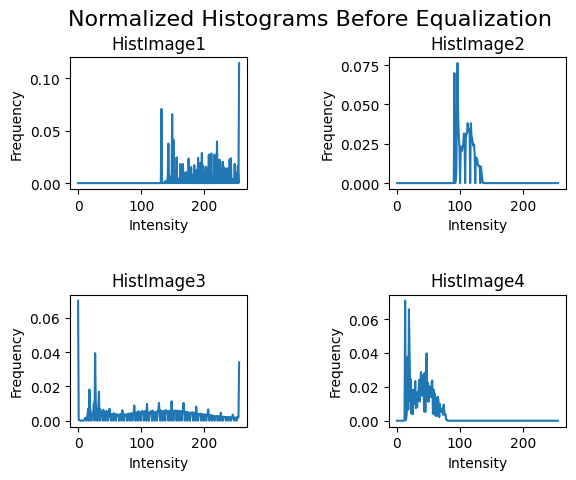

In [141]:
plot_hists(histograms)

In [140]:
# Function to plot a dictionary of image histograms and their titles/names
def plot_hists(histograms):
        for idx in range(len(histograms["images"])):
                fig = plt.subplot(2, 2, idx + 1)
                plt.subplots_adjust(hspace=0.8, wspace=0.8)
                plt.plot(histograms["images"][idx])
                #sns.histplot(data=histograms["images"][1], stat="probability", ax=fig)
                plt.title(histograms["titles"][idx])
                plt.xlabel("Intensity")
                plt.ylabel("Frequency")
        plt.suptitle("Normalized Histograms Before Equalization", fontsize=16)

# Project 2: Equalize Histogram

In [151]:
def project2_eq(path):
    histograms2 = {"images": [], "titles": []}

    for idx, file in enumerate(os.listdir("../data/lab04/")):
        
        # Plot setup
        fig = plt.subplot(2, 2, idx + 1)
        plt.subplots_adjust(hspace=0.5, wspace=0.5, top=0.85)
        fig.set_xticks([])
        fig.set_yticks([])
        
        # Read files
        local_path = path+file
        img = cv2.imread(os.path.abspath(local_path), 0)
        
        # Save name of image
        name = file.split(".")[0]
        #print(name)

        # Equalize histograms
        equ = cv2.equalizeHist(img)
        compare = np.hstack((img,equ))
        
        # Plot results
        plt.imshow(compare, cmap="grey")
        plt.title(name)

    plt.suptitle("Normalized Images After Equalization", fontsize=16)
    plt.show()
    

In [146]:
def project2_eq_hist(path, hists):
   # histograms2 = {"images": [], "titles": []}

    for idx, file in enumerate(os.listdir("../data/lab04/")):
        
        # Plot setup
        fig = plt.subplot(2, 2, idx + 1)
        plt.subplots_adjust(hspace=0.8, wspace=0.5, top=0.85)
        
        # Read files
        local_path = path+file
        img = cv2.imread(os.path.abspath(local_path), cv2.IMREAD_GRAYSCALE)
        
        # Save name of image
        name = file.split(".")[0]
        #print(name)

        # Equalize histograms
        equ = cv2.equalizeHist(img)
        equ_hist = cv2.calcHist([equ], [0], None, [256], [0,256])
        equ_hist = equ_hist/equ_hist.sum()
        compare = np.hstack((img,equ))
        
        # Plot results
        plt.plot(equ_hist, color="b")
        plt.title(name)
        plt.xlabel("Intensity")
        plt.ylabel("Frequency")

    plt.suptitle("Normalized Histograms After Equalization", fontsize=16)
    plt.show()
    

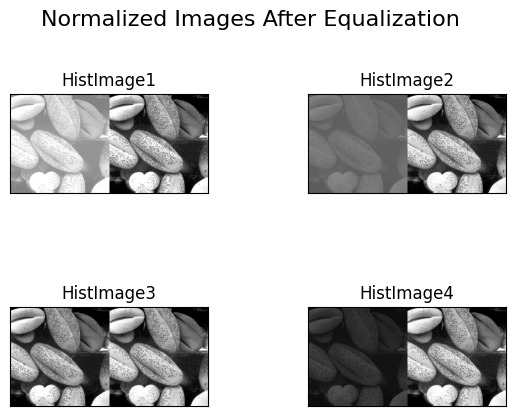

In [152]:
project2_eq(path) # Images

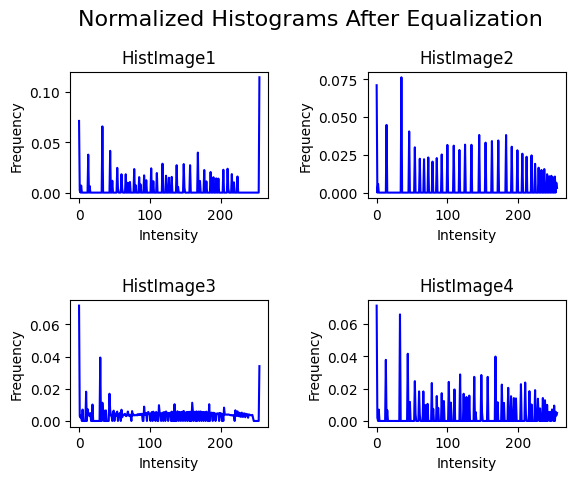

In [148]:
project2_eq_hist(path, histograms) # Histograms